In [132]:
import nltk
from nltk.corpus import treebank 
from nltk.tree import Tree
import csv 
import pandas as pd
import numpy as np
import seaborn as sns
import string
import re
import math
import sklearn
from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_csv(r'../data/train_final.csv')
df = df.loc[df['sentiment'] != 'neutral']

def calculate_class(x):
    if x == 'negative':
        return -1.0
    if x == 'positive':
        return 1.0
    return 0.0

df['classification'] = df['sentiment'].apply(lambda x : calculate_class(x))

In [33]:
df.head()

,text,sentiment,classification
1,Sooo SAD I will miss you here in San Diego!!!,negative,-1.0
2,my boss is bullying me...,negative,-1.0
3,what interview! leave me alone,negative,-1.0
4,"Sons of ****, why couldn`t they put them on t...",negative,-1.0
6,2am feedings for the baby are fun when he is a...,positive,1.0


In [38]:
sample_sentence = df["text"][0]
sample_sentence

' I`d have responded, if I were going'

In [39]:
tokens = nltk.word_tokenize(sample_sentence)
tagged = nltk.pos_tag(tokens)
print(tokens)
print(tagged)

['I', '`', 'd', 'have', 'responded', ',', 'if', 'I', 'were', 'going']
[('I', 'PRP'), ('`', '``'), ('d', 'NNS'), ('have', 'VBP'), ('responded', 'VBN'), (',', ','), ('if', 'IN'), ('I', 'PRP'), ('were', 'VBD'), ('going', 'VBG')]


<AxesSubplot:xlabel='sentiment', ylabel='count'>

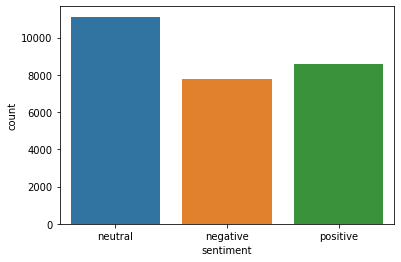

In [41]:
sns.countplot(x = 'sentiment', data = df)

### Data Preprocessing

In [34]:
stopword = nltk.corpus.stopwords.words('english')

In [35]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

def tokenization(text):
    text = text.strip()
    text = re.split('\W+', text)
    return text

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['clean_text'] = df['text'].apply(lambda x: remove_stopwords(tokenization(remove_punct(x).lower())))
df.head(10)

,text,sentiment,classification,clean_text
1,Sooo SAD I will miss you here in San Diego!!!,negative,-1.0,"[sooo, sad, miss, san, diego]"
2,my boss is bullying me...,negative,-1.0,"[boss, bullying]"
3,what interview! leave me alone,negative,-1.0,"[interview, leave, alone]"
4,"Sons of ****, why couldn`t they put them on t...",negative,-1.0,"[sons, couldnt, put, releases, already, bought]"
6,2am feedings for the baby are fun when he is a...,positive,1.0,"[feedings, baby, fun, smiles, coos]"
9,Journey!? Wow... u just became cooler. hehe....,positive,1.0,"[journey, wow, u, became, cooler, hehe, possible]"
11,I really really like the song Love Story by Ta...,positive,1.0,"[really, really, like, song, love, story, tayl..."
12,My Sharpie is running DANGERously low on ink,negative,-1.0,"[sharpie, running, dangerously, low, ink]"
13,i want to go to music tonight but i lost my vo...,negative,-1.0,"[want, go, music, tonight, lost, voice]"
15,"Uh oh, I am sunburned",negative,-1.0,"[uh, oh, sunburned]"


In [36]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['further_clean_text'] = df['clean_text'].apply(lambda x: stemming(lemmatizer(x)))
df.head(10)

,text,sentiment,classification,clean_text,further_clean_text
1,Sooo SAD I will miss you here in San Diego!!!,negative,-1.0,"[sooo, sad, miss, san, diego]","[sooo, sad, miss, san, diego]"
2,my boss is bullying me...,negative,-1.0,"[boss, bullying]","[bo, bulli]"
3,what interview! leave me alone,negative,-1.0,"[interview, leave, alone]","[interview, leav, alon]"
4,"Sons of ****, why couldn`t they put them on t...",negative,-1.0,"[sons, couldnt, put, releases, already, bought]","[son, couldnt, put, releas, alreadi, bought]"
6,2am feedings for the baby are fun when he is a...,positive,1.0,"[feedings, baby, fun, smiles, coos]","[feed, babi, fun, smile, coo]"
9,Journey!? Wow... u just became cooler. hehe....,positive,1.0,"[journey, wow, u, became, cooler, hehe, possible]","[journey, wow, u, becam, cooler, hehe, possibl]"
11,I really really like the song Love Story by Ta...,positive,1.0,"[really, really, like, song, love, story, tayl...","[realli, realli, like, song, love, stori, tayl..."
12,My Sharpie is running DANGERously low on ink,negative,-1.0,"[sharpie, running, dangerously, low, ink]","[sharpi, run, danger, low, ink]"
13,i want to go to music tonight but i lost my vo...,negative,-1.0,"[want, go, music, tonight, lost, voice]","[want, go, music, tonight, lost, voic]"
15,"Uh oh, I am sunburned",negative,-1.0,"[uh, oh, sunburned]","[uh, oh, sunburn]"


In [37]:
df = df.loc[df['further_clean_text'].str.len() > 0]

In [44]:
df.head(10)

,text,sentiment,classification,clean_text,further_clean_text
1,Sooo SAD I will miss you here in San Diego!!!,negative,-1.0,"[sooo, sad, miss, san, diego]","[sooo, sad, miss, san, diego]"
2,my boss is bullying me...,negative,-1.0,"[boss, bullying]","[bo, bulli]"
3,what interview! leave me alone,negative,-1.0,"[interview, leave, alone]","[interview, leav, alon]"
4,"Sons of ****, why couldn`t they put them on t...",negative,-1.0,"[sons, couldnt, put, releases, already, bought]","[son, couldnt, put, releas, alreadi, bought]"
6,2am feedings for the baby are fun when he is a...,positive,1.0,"[feedings, baby, fun, smiles, coos]","[feed, babi, fun, smile, coo]"
9,Journey!? Wow... u just became cooler. hehe....,positive,1.0,"[journey, wow, u, became, cooler, hehe, possible]","[journey, wow, u, becam, cooler, hehe, possibl]"
11,I really really like the song Love Story by Ta...,positive,1.0,"[really, really, like, song, love, story, tayl...","[realli, realli, like, song, love, stori, tayl..."
12,My Sharpie is running DANGERously low on ink,negative,-1.0,"[sharpie, running, dangerously, low, ink]","[sharpi, run, danger, low, ink]"
13,i want to go to music tonight but i lost my vo...,negative,-1.0,"[want, go, music, tonight, lost, voice]","[want, go, music, tonight, lost, voic]"
15,"Uh oh, I am sunburned",negative,-1.0,"[uh, oh, sunburned]","[uh, oh, sunburn]"


### Compute TF-IDF

In [9]:
unique_words = set()
for tokens in df['further_clean_text']:
    unique_words = unique_words.union(set(tokens))
print(len(unique_words))

16044


In [10]:
len(df['further_clean_text'])

16359

In [11]:
def computeIDF(documents):
    N = len(documents)
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict


In [12]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

def getBagOfWords(text_list):
    return set(text_list)

documents = []
for tokens in df['further_clean_text']:
    bag = getBagOfWords(tokens)
    num_of_words = dict.fromkeys(unique_words, 0)
    for word in bag:
        num_of_words[word] += 1
    tf = computeTF(num_of_words, bag)
    documents.append(tf)
    
idfs = computeIDF(documents)

In [ ]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

dictionaries = []
i = 0
for tokens in df['further_clean_text']:
    tfidf = computeTFIDF(documents[i], idfs)    
    dictionaries.append(tfidf)
    i += 1

sample_df = pd.DataFrame.from_dict(dictionaries)
    

In [99]:
sample_df

,alreadi,miss,sad,bulli,put,diego,son,go,leav,sooo,alon,bo,bought,interview,san,releas,id,couldnt,respond
0,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.536479,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.536479,0.00000,0.536479
1,0.00000,0.321888,0.321888,0.000000,0.00000,0.321888,0.00000,0.000000,0.000000,0.321888,0.000000,0.000000,0.00000,0.000000,0.321888,0.00000,0.000000,0.00000,0.000000
2,0.00000,0.000000,0.000000,0.804719,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.804719,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.536479,0.000000,0.536479,0.000000,0.00000,0.536479,0.000000,0.00000,0.000000,0.00000,0.000000
4,0.26824,0.000000,0.000000,0.000000,0.26824,0.000000,0.26824,0.000000,0.000000,0.000000,0.000000,0.000000,0.26824,0.000000,0.000000,0.26824,0.000000,0.26824,0.000000


Due to memory limitations we will not be using TF-IDF for our embedding, but this demonstrates the issue adversarial examples create across social media. The vocabulary space has grown extremely large causing this approach to require more memory than we have access to. An industrial setting may have the hardware capable of supporting this approach, but the problem is also at a larger scale for industrial platforms. 

### Gensim Word2Vec

In [39]:
import gensim

In [121]:
model = gensim.models.Word2Vec(df['further_clean_text'], window=10, min_count=2, seed=1)

In [122]:
model.wv.most_similar('hello', topn=10)

[('say', 0.9994595050811768),
 ('hey', 0.9993963241577148),
 ('said', 0.9993407726287842),
 ('p', 0.9993391633033752),
 ('hehe', 0.999327540397644),
 ('mani', 0.9993202686309814),
 ('she', 0.9993056058883667),
 ('song', 0.999302327632904),
 ('littl', 0.9992911219596863),
 ('job', 0.9992825388908386)]

In [101]:
len(model.wv['hello'])

100

In [102]:
len(model.wv)

16044

So our dataset consists of 16044 documents each with varying number of words. Let us first try using the mean of the vectors of each words

In [130]:
def create_data(train_data, label_data):
    n = 100
    m = len(train_data)
    X = np.zeros((m, n))
    y = label_data

    ind = 0
    for tokens in train_data:
        vec = np.zeros((n))
        count = 0
        for token in tokens:
            if token in model.wv:
                count += 1
                vec += model.wv[token]
        if count != 0:
            vec = np.divide(vec, count)
        X[ind] = vec
        ind += 1
    return X, y

In [142]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(df['further_clean_text'], df['classification'], test_size=0.2)
print(X_train_raw.shape)
print(X_test_raw.shape)
print(y_train_raw.shape)
print(y_test_raw.shape)

(13087,)
(3272,)
(13087,)
(3272,)


In [145]:
X_train, y_train = create_data(X_train_raw, y_train_raw)

In [ ]:
# def gd(X_train, y_train, w, lambd, gamm):
#     w = np.zeros(X_train.shape[1])
#     i = 0
#     converged = False
#     thresh = 1e-9
#     while not converged and i <= 1000:
#         grad = 
#         err = np.linalg.norm(np.matmul(X, w) - y, 2) + lambd * np.linalg.norm(w, 1)
        